# Подготовка данных

Скачивание архива с диска реализовано через wget:

In [1]:
!wget -O data.zip "https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/adjYzzNayB1pag"

--2023-01-08 19:22:01--  https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/adjYzzNayB1pag
Resolving getfile.dokpub.com (getfile.dokpub.com)... 142.132.255.217
Connecting to getfile.dokpub.com (getfile.dokpub.com)|142.132.255.217|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://downloader.disk.yandex.ru/disk/3c41abf49fc4b642f65e4b63409b052dc87aee39596b421bb616d94df275a781/63bb501a/z1iPFbqWc2iDq3uPFEvwr5DMhRwRKWJf5-3QLhGqwqpcM_sc8bEusWXzo7-O57Y_j7EDNpvp79Npa_wg2AND3A%3D%3D?uid=0&filename=CCPD2019-dl1.zip&disposition=attachment&hash=Wd3FkbQHwx2iDaiDNCtsariJnF0D8MWpk6A/24d83WFPcsO5YLaT6d7qqYsS/kaIq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=18005499&fsize=2329567530&hid=ab0a41e5107b756e384a2ec62bef3eb3&media_type=compressed&tknv=v2 [following]
--2023-01-08 19:22:02--  https://downloader.disk.yandex.ru/disk/3c41abf49fc4b642f65e4b63409b052dc87aee39596b421bb616d94df275a781/63bb501a/z1iPFbqWc2iDq3uPFEvwr5DMh

In [2]:
!unzip -q data.zip

In [3]:
!cd CCPD2019-dl1/train && ls -a

Выходные данные были обрезаны до нескольких последних строк (5000).
0137452107279-皖AJ187J.jpg   0272928639847-皖H65721.jpg
0137452107279-皖AJ5D06.jpg   0272928639847-皖NF0950.jpg
0137452107279-皖AJL012.jpg   0272940613027-皖A070J2.jpg
0137452107279-皖AKG950.jpg   0272940613027-皖A073P9.jpg
0137452107279-皖AL0H51.jpg   0272940613027-皖A162X7.jpg
0137452107279-皖AMX607.jpg   0272940613027-皖AE799Z.jpg
0137452107279-皖AT006F.jpg   0272940613027-皖AEH520.jpg
0137452107279-皖AT911M.jpg   0272940613027-皖AF7A19.jpg
0137452107279-皖AVK276.jpg   0272940613027-皖AG8824.jpg
0137452107279-皖AX6537.jpg   0272940613027-皖AH2L88.jpg
0137452107279-皖AXL969.jpg   0272940613027-皖AS424X.jpg
0137452107279-皖AY624D.jpg   0272940613027-皖ASM531.jpg
0137452107279-皖AYR822.jpg   0272940613027-皖AW984L.jpg
0137452107279-皖AZ053F.jpg   0272940613027-皖AX5S91.jpg
0137452107279-皖AZ620J.jpg   0272940613027-皖AX9K10.jpg
0137452107279-皖EXY582.jpg   0272940613027-皖AZL201.jpg
0137452107279-皖LS1000.jpg   0272940613027-苏A3X9X2.jpg
0137452107279-

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [4]:
import os

import cv2
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

In [35]:
import os
import sys
import pdb
import six
import random
import lmdb
from PIL import Image
import numpy as np
import math
from collections import OrderedDict
from itertools import chain
import logging


import torch
torch.manual_seed(42)

import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import sampler
import torchvision.transforms as transforms
from torch.optim.lr_scheduler import CosineAnnealingLR, StepLR
from torch.nn.utils.clip_grad import clip_grad_norm_
from torch.utils.data import random_split

from tqdm import tqdm

In [36]:
provinces = ["皖", "沪", "津", "渝", "冀", "晋", "蒙", "辽", "吉", "黑", "苏", "浙", "京", "闽", "赣", "鲁", "豫", "鄂", "湘", "粤", "桂", "琼", "川", "贵", "云", "藏", "陕", "甘", "青", "宁", "新", "警", "学", "O"]
alphabets = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'O']
ads = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'O']

SYMBOLS = sorted(list(set(provinces + alphabets + ads)))
print(SYMBOLS)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '云', '京', '冀', '吉', '学', '宁', '川', '新', '晋', '桂', '沪', '津', '浙', '渝', '湘', '琼', '甘', '皖', '粤', '苏', '蒙', '藏', '警', '豫', '贵', '赣', '辽', '鄂', '闽', '陕', '青', '鲁', '黑']


In [37]:
def encode(symb):
    assert symb in SYMBOLS, "error: invalid character"
    return SYMBOLS.index(symb)

def decode(num):
    assert 0 <= num < len(SYMBOLS), "error: invalid symbol index"
    return SYMBOLS[num]

def decode_tensor(tens) -> str:
    return "".join([decode(row.argmax().item()) for row in tens])

def decode_list(lst) -> str:
    return "".join([decode(elem) for elem in lst])

In [38]:
class SynthDataset(Dataset):
    def __init__(self, load_test=False):
        super().__init__()
        self.path = "CCPD2019-dl1/test" if load_test else "CCPD2019-dl1/train"
        self.images = os.listdir(self.path)
        self.size = len(self.images)
        f = lambda x: os.path.join(self.path, x)
        self.imagepaths = list(map(f, self.images))

    def __len__(self):
        return self.size

    def __getitem__(self, index):
        assert index <= len(self), 'index range error'
        imagepath = self.imagepaths[index]
        imagefile = os.path.basename(imagepath)

        img = cv2.imread(imagepath)
        # resize image for easier work with CNN
        img = cv2.resize(img, (288, 96))

        label = imagefile.split('-')[1].replace(".jpg", "")
        label = list(map(encode, label))
        label = torch.tensor(label)
        return torch.tensor(img).permute(2, 0, 1), F.one_hot(label, num_classes=len(SYMBOLS))

In [39]:
train_dataset = SynthDataset()
test_dataset = SynthDataset(load_test=True)

print(f"Train data size: {len(train_dataset)}\nTest data size: {len(test_dataset)}")

Train data size: 199980
Test data size: 9999


torch.Size([3, 96, 288])


/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 30358 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.8/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 30358 missing from current font.
  font.set_text(s, 0, flags=flags)


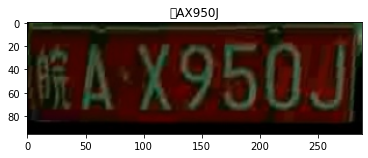

In [40]:
SAMPLE = 7000

print(train_dataset[SAMPLE][0].shape)

plt.imshow(train_dataset[SAMPLE][0].permute(1, 2, 0))
# chinese characters are drawn with errors
plt.title(decode_tensor(train_dataset[SAMPLE][1]))
plt.show()

In [41]:
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=False)

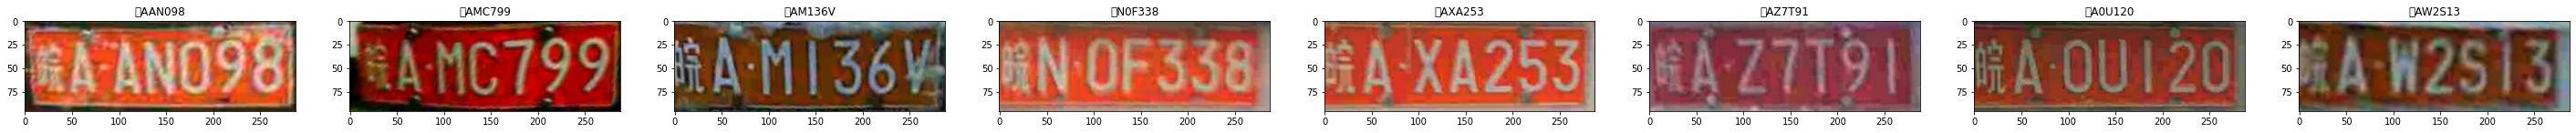

In [42]:
# функция отрисовки картинок
def show_images(images, labels):
    f, axes= plt.subplots(1, 8, figsize=(50, 7))
    
    for i, axis in enumerate(axes):
        # переводим картинку из тензора в numpy
        img = images[i].numpy()
        # переводим картинку в размерность (длина, ширина, цветовые каналы) 
        img = np.transpose(img, (1, 2, 0))

        axes[i].imshow(img)
        axes[i].set_title(decode_tensor(labels[i]))

    plt.show()

# получаем батч картинок
for batch in test_loader:
    # print(batch)
    images, labels = batch
    break

show_images(images, labels)

# Создание и обучение модели

In [43]:
class BidirectionalLSTM(nn.Module):
    def __init__(self, nIn, nHidden, nOut):
        super().__init__()
        self.rnn = nn.LSTM(nIn, nHidden, bidirectional=True)
        self.embedding = nn.Linear(nHidden * 2, nOut)

    def forward(self, input):
        self.rnn.flatten_parameters()
        recurrent, _ = self.rnn(input)
        T, b, h = recurrent.size()
        t_rec = recurrent.view(T * b, h)
        output = self.embedding(t_rec)  # [T * b, nOut]
        output = output.view(T, b, -1)
        return output

class CRNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 16, kernel_size=(5, 5))           # [batch_size, 3, 96, 288] -> [batch_size, 16, 92, 284]
        self.pool1 = nn.MaxPool2d(kernel_size=(2, 2))               # [batch_size, 16, 92, 284] -> [batch_size, 16, 46, 142]
        self.conv2 = nn.Conv2d(16, 32, kernel_size=(3, 3))          # [batch_size, 16, 46, 142] -> [batch_size, 32, 44, 140]
        self.pool2 = nn.MaxPool2d(kernel_size=(2, 2))               # [batch_size, 32, 44, 140] -> [batch_size, 32, 22,  70]
        self.conv3 = nn.Conv2d(32, 64, kernel_size=(3, 3))          # [batch_size, 32, 22,  70] -> [batch_size, 64, 20,  68]
        self.pool3 = nn.MaxPool2d(kernel_size=(2, 2))               # [batch_size, 64, 20,  68] -> [batch_size, 64, 10,  34]
        self.conv4 = nn.Conv2d(64, 128, kernel_size=(3, 3))         # [batch_size, 64, 10,  34] -> [batch_size, 128,  8,  32]
        self.pool4 = nn.MaxPool2d(kernel_size=(2, 2))               # [batch_size, 128,  8,  32] -> [batch_size, 128,  4,  16]
        self.conv5 = nn.Conv2d(128, 256, kernel_size=(3, 3))        # [batch_size, 128,  4,  16] -> [batch_size, 256,  2,  14]
        self.pool5 = nn.MaxPool2d(kernel_size=(2, 2))               # [batch_size, 256,  2,  14] -> [batch_size, 256,  1,   7]

        self.cnn = nn.Sequential(
            self.conv1,
            self.pool1,
            self.conv2,
            self.pool2,
            self.conv3,
            self.pool3,
            self.conv4,
            self.pool4,
            self.conv5,
            self.pool5,
        )
        # self.rnn = nn.Sequential(
        #     BidirectionalLSTM(256, 128, 128),
        #     BidirectionalLSTM(128, 128, len(SYMBOLS))
        # )
        self.rnn = nn.Sequential(
            nn.Linear(256, 128),
            nn.Linear(128, len(SYMBOLS))
        )

    def forward(self, input):
        # conv features
        input = input.type(torch.float32)
        conv = self.cnn(input)
        b, c, h, w = conv.size()
        # print(conv.size())
        assert h == 1, "the height of conv must be 1"

        # [b, c, h, w]
        conv = conv.squeeze(2)
        # [b, c, w]
        conv = conv.permute(2, 0, 1)  # [w, b, c]

        # rnn features
        output = self.rnn(conv)
        output = output.transpose(1, 0)
        output = output.transpose(1, 2)
        return output

In [44]:
test_crnn = CRNN()

for batch in train_loader:
    images, labels = batch
    print(test_crnn(batch[0]).shape)
    break

torch.Size([128, 68, 7])


In [45]:
def evaluate(model, dataloader, loss_fn):
    losses = []

    total_Lev = 0
    num_elements = 0

    for i, batch in tqdm(enumerate(dataloader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        num_elements += len(y_batch)
        
        with torch.no_grad():
            logits = model(X_batch.to(device))

            y_batch = y_batch.argmax(axis=2)

            loss = loss_fn(logits, y_batch.to(device))
            losses.append(loss.item())
            
            # y_pred = torch.argmax(logits, dim=1)
            
            total_Lev += loss_Lev_distance(logits, y_batch.to(device))
    
    mean_Lev = total_Lev / num_elements
            
    return mean_Lev, np.mean(losses)

def train(model, loss_fn, optimizer, n_epoch=3):
    # цикл обучения сети
    for epoch in range(n_epoch):

        print("Epoch:", epoch+1)

        model.train(True)
        
        running_losses = []
        running_accuracies = []
        for i, batch in enumerate(tqdm(train_loader)):
            # получаем текущий батч
            X_batch, y_batch = batch 
            
            # forward pass (получение ответов на батч картинок)
            logits = model(X_batch.to(device)) 
            
            # вычисление лосса от выданных сетью ответов и правильных ответов на батч
            y_batch = y_batch.argmax(axis=2)
            loss = loss_fn(logits, y_batch.to(device)) 
            running_losses.append(loss.item())
            
            loss.backward() # backpropagation (вычисление градиентов)
            optimizer.step() # обновление весов сети
            optimizer.zero_grad() # обнуляем градиенты
            
            # вычислим accuracy на текущем train батче
            # model_answers = torch.argmax(logits, dim=1)
            # train_accuracy = torch.sum(y_batch == model_answers.cpu()) / len(y_batch)
            # running_accuracies.append(train_accuracy)

            # # Логирование результатов
            # if (i+1) % 100 == 0:
            #     print("Средние train_loss и accuracy на последних 50 итерациях:", 
            #           np.mean(running_losses), np.mean(running_accuracies), end='\n')

        # после каждой эпохи получаем метрику качества на валидационной выборке
        model.train(False)

        val_mean_Lev, val_loss = evaluate(model, test_loader, loss_fn=loss_fn)
        print("Эпоха {}/{}: val_loss и mean_Lev:".format(epoch+1, n_epoch,), val_loss, val_mean_Lev, end='\n')
        
    return model

# Подсчет метрик

In [46]:
class CustomCTCLoss(torch.nn.Module):
    # T x B x H => Softmax on dimension 2
    def __init__(self, dim=2):
        super().__init__()
        self.dim = dim
        self.ctc_loss = torch.nn.CTCLoss(reduction='mean', zero_infinity=True)

    def forward(self, logits, labels,
            prediction_sizes, target_sizes):
        EPS = 1e-7
        loss = self.ctc_loss(logits, labels, prediction_sizes, target_sizes)
        loss = self.sanitize(loss)
        return self.debug(loss, logits, labels, prediction_sizes, target_sizes)
    
    def sanitize(self, loss):
        EPS = 1e-7
        if abs(loss.item() - float('inf')) < EPS:
            return torch.zeros_like(loss)
        if math.isnan(loss.item()):
            return torch.zeros_like(loss)
        return loss

    def debug(self, loss, logits, labels,
            prediction_sizes, target_sizes):
        if math.isnan(loss.item()):
            print("Loss:", loss)
            print("logits:", logits)
            print("labels:", labels)
            print("prediction_sizes:", prediction_sizes)
            print("target_sizes:", target_sizes)
            raise Exception("NaN loss obtained. But why?")
        return loss

In [47]:
!pip install python-Levenshtein

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [48]:
from Levenshtein import distance

In [49]:
def loss_Lev_distance(logits, labels):
    total_dist = 0
    # from one-hot to symbol codes
    logits = logits.argmax(axis=1)

    for i, elem in enumerate(logits):
        total_dist += distance(decode_list(elem), decode_list(labels[i]))
    return total_dist

for batch in train_loader:
    images, labels = batch
    logits = test_crnn(batch[0])
    labels = labels.argmax(axis=2)
    print(loss_Lev_distance(logits, labels))
    break

870


In [50]:
model = CRNN()

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# выбираем функцию потерь
loss_fn = torch.nn.CrossEntropyLoss()

# выбираем алгоритм оптимизации и learning_rate
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [51]:
model = train(model, loss_fn, optimizer, n_epoch=3)

Epoch: 1


100%|██████████| 1563/1563 [02:51<00:00,  9.10it/s]
79it [00:16,  4.77it/s]


Эпоха 1/4: val_loss и mean_Lev: 0.05266647759966458 0.0784078407840784
Epoch: 2


100%|██████████| 1563/1563 [02:42<00:00,  9.61it/s]
79it [00:16,  4.80it/s]


Эпоха 2/4: val_loss и mean_Lev: 0.05019567041551765 0.07290729072907291
Epoch: 3


100%|██████████| 1563/1563 [02:42<00:00,  9.60it/s]
79it [00:17,  4.56it/s]


Эпоха 3/4: val_loss и mean_Lev: 0.04292482137090609 0.06090609060906091
Epoch: 4


100%|██████████| 1563/1563 [02:42<00:00,  9.59it/s]
79it [00:16,  4.76it/s]

Эпоха 4/4: val_loss и mean_Lev: 5.253033784371388 0.30953095309530954


# Анализ ошибок модели

In [66]:
eval_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

def find_max_error(model):
    losses = []

    errors = dict()
    num_elements = 0

    for i, batch in tqdm(enumerate(eval_loader)):
        # так получаем текущий батч
        X_batch, y_batch = batch
        num_elements += len(y_batch)
        
        with torch.no_grad():
            logits = model(X_batch.to(device))
            y_batch = y_batch.argmax(axis=2)
            
            logits = logits.argmax(axis=1)
            labels = y_batch.to(device)
            # batch_size is set to 1
            dist = distance(decode_list(logits[0]), decode_list(labels[0]))
            errors[i] = dist
    
    errors = {k: v for k, v in sorted(errors.items(), key=lambda item: item[1])}
    # we will analyze top-8 Levenshtein errors
    out = []
    i == 0
    for k, v in errors.items():
        if i == 8:
            break
        i += 1
        out.append((k, v))
    return out

In [69]:
# функция отрисовки картинок для анализа ошибок
def show_test_images(image, label_pred, label_true, dist):
    fig = plt.figure(figsize=(10, 5))

    # переводим картинку из тензора в numpy
    img = image.numpy()
    # переводим картинку в размерность (длина, ширина, цветовые каналы) 
    img = np.transpose(img, (1, 2, 0))

    plt.imshow(img)
    plt.set_title(f"True: {decode_tensor(label_true)}\nPredicted: {decode_tensor(label_pred)}\nErr = {dist}")

    plt.show()

# получаем топ ошибочных картинок и отрисовываем их
for error in find_max_error(model):
    ind, dist = error
    image, label = test_dataset[ind]

    logits = model(image.to(device)) 
    logits = logits.argmax(axis=1)

    show_test_images(image, label, dist)
    break

9999it [00:27, 363.71it/s]


ValueError: ignored